# Case Study: Climbing the Empire State Building 

### 🏙️ Scenario

You're walking up the Empire State Building with a friend and playing a dice game to determine your steps. 

**Rules**:**

- 🎲 Roll a die **100 times**.
- If you roll:
  - **1 or 2** → Step **down** 1 floor (but never below 0).
  - **3, 4, or 5** → Step **up** 1 floor.
  - **6** → Roll again and step **up** that number of floors. 
- On each move, there's a *0.1% chance* of falling
  - If a fall happens -> you return to **step 0** 



🎯 **Goal**: Reach **60 floors or higher**.

**Key Question**: What is the probability of reaching 60 floors or higher given the rules of this game? 

### 🔹 Strategy: How to Solve

**Options**
- Use actual statistics -  complex probability theory and mathematical equations. 

- Use **"Hacker Statistics"** - use some simple yet powerful concepts in Python to write a program to simulate the game 10,000 times and see how often we reach 60 floors or higher. 

**Why or when should we use do this** This approach utilizes computing power instead of calculus, and is ideal for complex systems & real-world data where equations/mathematical theory are hard to apply. 

**Note** this isn't a substitute for real statistics. This is a powerful way to solve various statistical problems 

### 🔹 Strategy: How to Approach the Problem

There are two main ways we could try to solve this:

- **Math Approach: Statistics & Probability Theory:**  
  We could try to use formal statistics and probability theory equations to calculate **the exact chance of reaching floor 60**.  
  Some problems are great for this — like the probability of getting heads on a single coin toss (50%).  

  But for many real-world scenarios, like this 100-step dice game with highly specific rules set inside the Empire State Building... there often isn't a clean formula we can just plug into.

- **Simulation Approach: Python:**  
Another option is to simulate the game thousands of times and see how often we reach floor 60 or higher.  
In this case, we’ll do exactly that — using simple Python code to run the game repeatedly, track the final floor each time, and use those results to estimate the probability of reaching floor 60 or above.


> ⚠️ *Note: This isn't a substitute for formal statistics — just a practical way to explore probability when exact answers are hard to get.*



### 🎲 Rolling the Dice: Simulating Randomness
- We need a way to simulate rolling dice and randomness in the game. 
- To do this, we’ll use `numpy.random`, which generates random numbers from a starting point called a **seed** 

- You can let Python pick a seed randomly, or set it yourself.
- Setting the seed yourself (e.g., `123`) means you’ll get the *same* random numbers every time you run the code.
- This allows the results to be reproducable - key for testing, debugging, sharing your work. 


### Setting Seed and Generating Random Numbers 

- `np.random.seed(n)`: Sets the random seed to an integer, (n). The same seed produces the same sequence of random numbers every time. 


- `np.random.rand()`: Generates a random float between 0 and 1.


In [12]:
#Generate a random number without setting a seed
#Since we don't set a seed using `np.random.seed() - the output will be different everytime we run this. 

import numpy as np
print("Random number without setting seed:", np.random.rand()) 

Random number without setting seed: 0.28079319859348617


In [ ]:
# Generate a random number by setting a seed: 
import numpy as np
np.random.seed(123)  # Set the seed to '123'
print(np.random.rand()) # Print the first random number for this seed. 
print(np.random.rand())     # Print the second random number for this seed. 

#The outputs will be the same eveyrtime you run this using the seed '123' 

0.6964691855978616
0.28613933495037946


In [13]:
# Roll the Dice 

#Use randint()to simulate a rolling a die by randomly generating an integer betwen 1 and 6. 
import numpy as np 
np.random.seed(123)

print(np.random.randint(1,7)) #Use randint() to simulate the first dice roll
print(np.random.randint(1,7)) #Call randint() again to simulate another dice roll. 

6
3


In [ ]:
#Determine Your Next Move. 

# The next move depends on what number you get after rolling the dice. Assume player is already at Step 50. 
import numpy as np 
np.random.seed(123)

step = 50 #Starting floor 

#Roll the Dice 
dice = np.random.randint(1,7)

#Apply dice rules using control flow  
if dice <= 2 : 
    step = step - 1 #Step down one floor 
elif dice in [3, 4, 5] : 
    step = step + 1 #Step up one floor 
else : 
    step = step + np.random.randint(1,7) #Roll again and step up that many floors. 
#Output the result
print(dice)
print(step)

#Output Explanation: 
# - dice = 6, so the else block runs and a second dice roll occurs.
# - Suppose the second roll is 3 → you move up 3 floors from your current step.
# - New step = 50 + 3 = 53

6
53


### Random Walk Concept

A **random walk** is a sequence of random steps where each new step depends on the previous one. 


Previously we simulated taking a single random step. Next, we will simulate *100* dice rolls/steps, updating our current position after each roll, to model the complete random walk.

### How to Simulate a Random Walk in Python (Dice Game Context)

- Use a **for loop** to simulate rolling the dice multiple times (e.g., 100 steps). 
- After each roll, update the current position by following the dice rules (control flow). 
    - Example: If current position = 50 and you roll a 3, you move up 1 floor to 51.  
- Use the **append()** method to add the new position (51) to the list. 
- The new position is added to the list and the loop continues... using it (51) as the current position.   
- The list tracks your updated position after each dice roll - simulating the complete random walk. 

**Summary:** 
- The `for loop` controls how many times you run the code (e.g., 100)
- The `append()` method inside the loop creates and updates the list for each dice roll. 


In [ ]:
#Simulate Random Walk 

import numpy as np 
np.random.seed(123)

#Initalize random_walk at position 0 

random_walk =[0]

#for loop -  on each iteration, set "step" = to the last item in the random_walk list (by using index [-1])

for x in range(100) : 
    step = random_walk[-1]
    dice = np.random.randint(1,7) #roll the dice 

    #Determine your next step 
    if dice <= 2 : 
        step = max(0, step-1) #use max to make sure dice doesnt go < 0. 
        #max returns the largest of the two arguments - ensuring step does not < 0 when decreasing it. 
    elif dice <= 5 : 
        step = step + 1 
    else: 
        step = step + np.random.randint(1,7) #roll again and take increase "step" by that amount. 
    
    random_walk.append(step) #append the new value of "step" to the random_walk list 

print(random_walk)
 

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


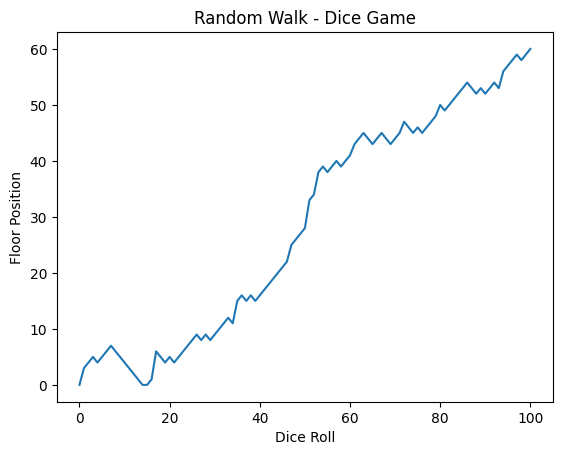

In [ ]:
#Matplotlib: visualize a random walk 
import matplotlib.pyplot as plt 

plt.plot(random_walk)
plt.title ("Random Walk - Dice Game")
plt.xlabel("Dice Roll")
plt.ylabel("Floor Position")
plt.show()

### Multiple Random Walks ###

So far in the previous step,  we simulated a single random walk, throwing a die 100 times and updating our floor position based on the result.  

Next we will extend the simulation: 
 - Simulate the random walk multiple times 
 - Use matplotlib to plot random walks showing the changes in position over time 
 - Add clumsiness logic - to factor in a .001 chance of falling and resettng to step == 0 

In [37]:
# Simulate 5 random walks and store in all_walks 

import numpy as np 
np.random.seed(123)

all_walks = []  # create all_walks list 

# Simulate random walk five times
for i in range(5) :

    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Now, we append random_walk to all_walks
    all_walks.append(random_walk)

# Print all_walks
print(all_walks)

##Output: all_walks is a list of lists where every sub-list represents a single random walk. 

[[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60], [0, 4, 3, 2, 4, 3, 4, 6, 7, 8, 13, 12, 13, 14, 15, 16, 17, 16, 21, 22, 23, 24, 23, 22, 21, 20, 19, 20, 21, 22, 28, 27, 26, 25, 26, 27, 28, 27, 28, 29, 28, 33, 34, 33, 32, 31, 30, 31, 30, 29, 31, 32, 35, 36, 38, 39, 40, 41, 40, 39, 40, 41, 42, 43, 42, 43, 44, 45, 48, 49, 50, 49, 50, 49, 50, 51, 52, 56, 55, 54, 55, 56, 57, 56, 57, 56, 57, 59, 64, 63, 64, 65, 66, 67, 68, 69, 68, 69, 70, 71, 73], [0, 2, 1, 2, 3, 6, 5, 6, 5, 6, 7, 8, 7, 8, 7, 8, 9, 11, 10, 9, 10, 11, 10, 12, 13, 14, 15, 16, 17, 18, 17, 18, 19, 24, 25, 24, 23, 22, 21, 22, 23, 24, 29, 30, 29, 30, 31, 32, 33, 34, 35, 34, 33, 34, 33, 39, 38, 39, 38, 39, 38, 3

### 🔍 Convert to NumPy Array for Plotting 

Next, we convert our list of walks (`all_walks`) into a NumPy array (`np_aw`) for easier plotting.

- We use `np_aw.shape` to check the shape of the array — this tells us how many rows and columns it has.
- The result is **(5, 101)**:
  - Each **row** represents one full random walk (5 walks total).
  - Each **column** represents the floor position at a specific step (steps 0 through 100).

- We try to plot and see it looks quite strange. 

- This is because when we covert the list of walks to a NumPy array-- each walk becomes a row and each step becomes a column
  - This is how NumPy arrays naturally organize data (rows, then columns). We'll fix this in the following step. 

Shape (5, 101)


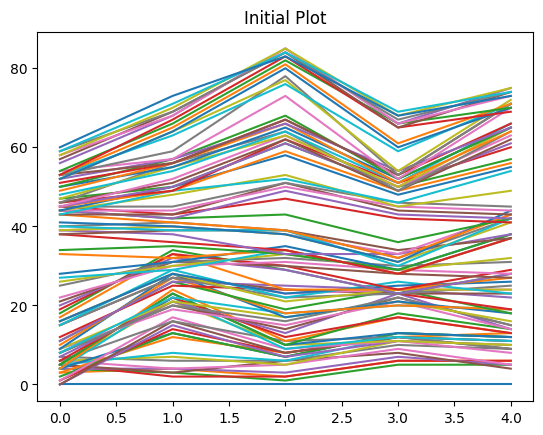

In [ ]:
#Convert all_walks to NumPy array for plotting 

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

#Convert all_walks to NumPy arary 
np_aw = np.array(all_walks)
#print(np_aw) 

#Check array shape (row, column)
print("Shape", np_aw.shape)

#Plot the array as is for now (will look weird)
plt.plot(np_aw)
plt.title("Initial Plot")
plt.show()

#Output explanation: 
# array has 5 rows, 101 columns 
# Each line on this plot is currently showing one full random walk - full sequence of 100 dice rolls. 
#When the plot looks "crazy," it’s because all five walks are plotted together, each with its own path.


### 🧪 Plotting Random Walks

Initially, our NumPy array looks like this:

- Each **row** represents a full random walk (includes all steps for that walk)
- Each **column** represents the floor position at a specific step across all walks.

When we try to plot it using `plt.plot()`, the result is a plot with **101 separate lines** — one for each column (step).  
This happens because `plt.plot()` treats each **column** as a separate line by default.

To fix this, we use `.transpose()` to swap the rows and columns, so that each **column** now hold the entire path for a single random walk. 

After transposing, we call `plt.plot()` and each line in the plot correctly shows a full random walk - showing how the floor position changes at each step. 

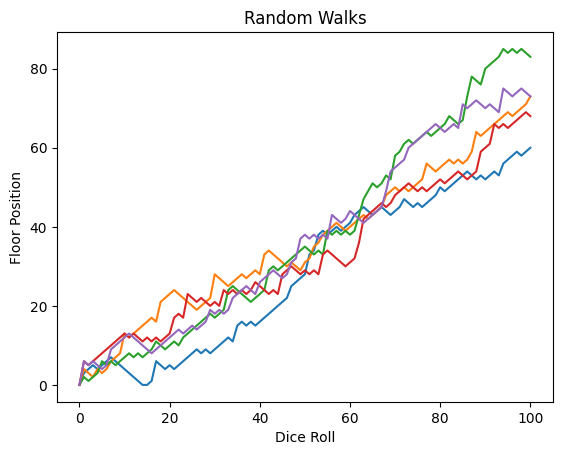

In [34]:
# 🔄 Transpose np_aw and Replot

# Transpose the array so that each line in the plot will show one full walk from start to finish.
np_aw_t = np.transpose(np_aw)

# Plot the transposed array
plt.plot(np_aw_t)
plt.title("Random Walks")
plt.xlabel("Dice Roll")
plt.ylabel("Floor Position")
plt.show()

### Adding Clumsiness - Chance to Fall  

- In this step, we add a 0.5% chance of falling on each dice roll. If you fall, you instantly return to floor 0 (step == 0)

- We'll add this to our logic by generating a random float between 0 and 1 using `np.random.rand()`. If the result <= .005 - reset the current step to 0. 

- We will also increase the total number of random walk simulations from 5 to 20. 

- The rest of the code remains the same. 

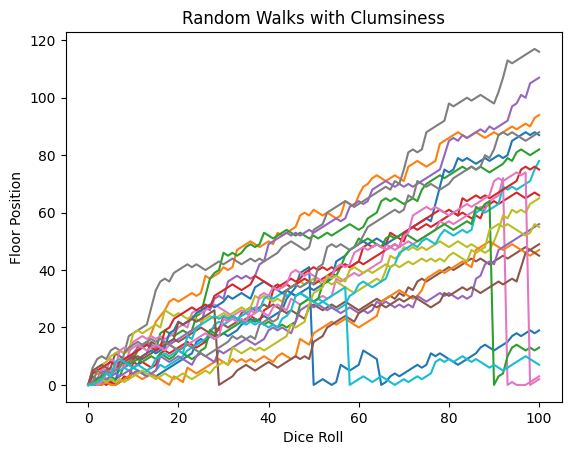

In [ ]:
# Add clumsiness + 20 simulations 
all_walks = []

for i in range(20):
    random_walk = [0]
    for x in range(100):
        step = random_walk[-1]
        dice = np.random.randint(1, 7)

        # Apply dice rules to update step
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1, 7)

        # 0.5% chance to fall and reset to floor 0
        if np.random.rand() <= 0.005:
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Convert list of walks to array and transpose for plotting
np_aw_t = np.transpose(np.array(all_walks))

# Plot all 20 random walks
plt.plot(np_aw_t)
plt.title("Random Walks with Clumsiness")
plt.xlabel("Dice Roll")
plt.ylabel("Floor Position")
plt.show()

### 📌 Selecting the Final Floors
We’ve simulated many full random walks, but now we need to understand where we end up after each random walk and store those results. 

After transposing, `np_aw_t` stores all our simulated walks — one **column** per walk, and one **row** per step.

- To get the **final floor** for each walk, we select the **last row** of the array.
- We do this using slicing: `np_aw_t[-1, :]`
  - `-1` → selects the last row (i.e., step 100, the end of each walk)
  - `:` → selects **all columns**, so we get the final floor from **every** walk

This gives us a new 1D NumPy array called `ends` — which contains the final result of each walk. We will use `ends` to plot those results in a histogram, showing how often we end at Floor 60 or higher. 



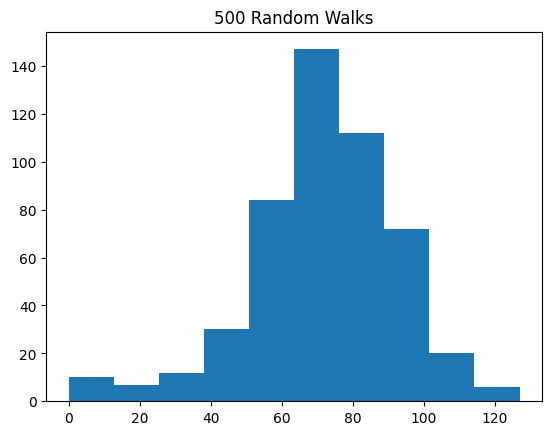

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 

np.random.seed(123)

# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 : #update clumsiness to .01
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.title("500 Random Walks")
plt.show()


### 🎲 Estimating the Probability of Reaching Floor 60 or Higher

The histogram gives a visual estimate of how often the random walks end near or above floor 60. 


But we can get a more precise estimate using our `ends` array, which stores the endpoints of the 500 simulated walks. Each number in `ends` represents an endpoint of a random walk.

To calculate the probability that a random walk ends at floor 60 or higher: 
- Count the total number of endpoints that are >= 60 from `ends ` (i.e. how many walks ended at or above Floor 60?)


- Divide that count by the total number of simulations (500) to get the estimated probability for this simulation. 

In [42]:
#Use np.mean to find how many walks ended >= 60

np.mean(ends>= 60)
#This works because the condition ends >= 60 creates an array of True and False values, where True is treated as 1 and False as 0. 
# The mean of this array gives the fraction of True values — i.e., the proportion of walks that reached floor 60 or higher.


0.784